Starting with GANs

In [1]:
# import Packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
from numpy.random import randn
from numpy import hstack, ones, zeros

In [13]:
# define Generator network
def define_your_gen(latent_dim, n_outputs=2):
    model = Sequential()
    model.add(Dense(5, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
    model.add(Dense(n_outputs, activation='linear')) # GEN output size must be the same with Data size
    return model

# define Discriminator
def define_disc(n_inputs=2):
    model = Sequential()
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# this is the GAN function that combines both the GEN & DISC
def define_your_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

# function to generate real data
def generate_real(n):
    X1 = randn(n) - 0.5
    X2 = X1 * X1
    X1 = X1.reshape(n, 1)
    X2 = X2.reshape(n, 1)
    X = hstack((X1, X2))
    y = ones((n, 1))
    return X, y

# function to generate uniformly random samples
def gen_latent_points(latent_dim, n):
    x_input = randn(latent_dim * n)
    x_input = x_input.reshape(n, latent_dim)
    return x_input

# function to generate synthetic data
def gen_fake(generator, latent_dim, n):
    x_input = gen_latent_points(latent_dim, n)
    X = generator.predict(x_input)
    y = zeros((n, 1))
    return X, y

# function to evaluate the Disciminator Model
def performance_summary(epoch, generator, discriminator, latent_dim, n=100):
    x_real, y_real = generate_real(n)
    _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
    x_fake, y_fake = gen_fake(generator, latent_dim, n)
    _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
    print(epoch, acc_real, acc_fake)
    plt.scatter(x_real[:, 0], x_real[:,1], color='green')
    plt.scatter(x_fake[:, 0], x_fake[:, 1], color='red')
    plt.show()

# training the GEN & DISCRIMINATOR
def train(g_model, d_model, your_gan_model, latent_dim, n_epochs=1000, n_batch=128, n_eval=100):
    half_batch = int(n_batch / 2)
    for i in range(n_epochs):
        x_real, y_real = generate_real(half_batch)
        x_fake, y_fake = gen_fake(g_model, latent_dim, half_batch)
        d_model.train_on_batch(x_real, y_real)
        d_model.train_on_batch(x_fake, y_fake)
        x_gan = gen_latent_points(latent_dim, n_batch)
        y_gan = ones((n_batch, 1))
        your_gan_model.train_on_batch(x_gan, y_gan)
        if (i + 1) % n_eval == 0:
            performance_summary(i, g_model, d_model, latent_dim)

99 0.6899999976158142 0.7900000214576721


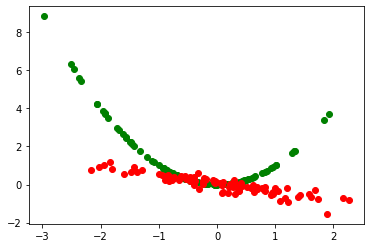

199 0.5400000214576721 0.3700000047683716


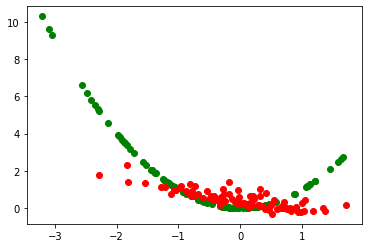

299 0.7300000190734863 0.36000001430511475


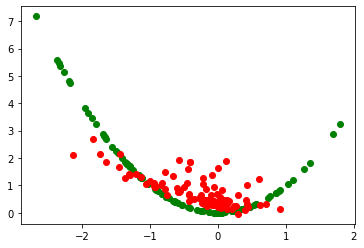

399 0.7900000214576721 0.46000000834465027


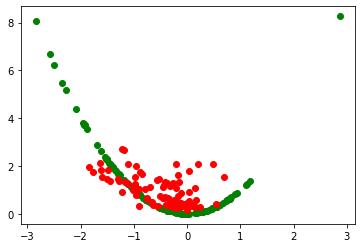

499 0.6700000166893005 0.6399999856948853


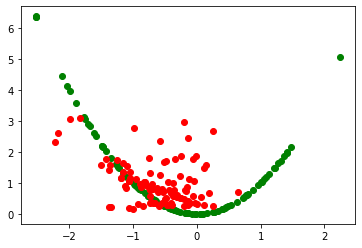

599 0.7099999785423279 0.6000000238418579


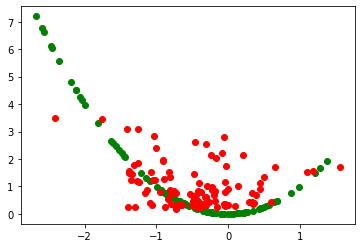

699 0.7799999713897705 0.5799999833106995


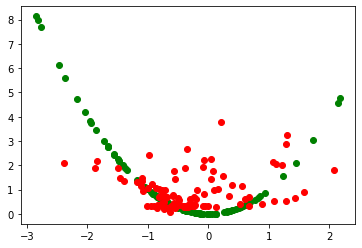

799 0.5299999713897705 0.6399999856948853


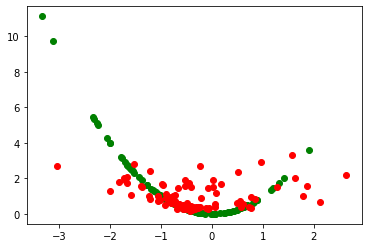

899 0.44999998807907104 0.6899999976158142


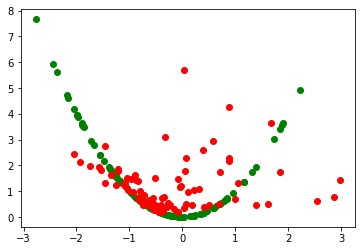

999 0.550000011920929 0.5899999737739563


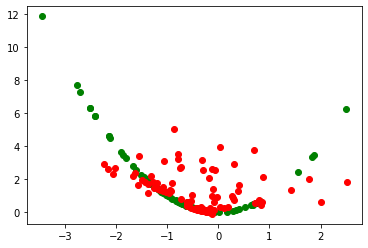

In [14]:
latent_dim = 5
generator = define_your_gen(latent_dim)
discriminator = define_disc()
your_gan_model = define_your_gan(generator, discriminator)
train(generator, discriminator, your_gan_model, latent_dim)